In [132]:
import numpy as np
import pandas as pd

# # Set the seed for reproducibility
# np.random.seed(42)

# Class 1: Mean vector and covariance matrix
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

# Creating DataFrame for Class 1
df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1  # Ensure this line runs correctly

# Class 2: Mean vector and covariance matrix
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

# Creating DataFrame for Class 2
df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0  # Ensure this line runs correctly

# Combining the data
df = pd.concat([df, df1], ignore_index=True)

# Taking a random sample of 40 rows from the combined DataFrame
df = df.sample(40)

In [133]:
df.head()

,feature1,feature2,feature3,target
36,0.718615,-0.664693,0.993801,0
6,-2.037076,1.570032,-0.302324,1
32,-0.730873,2.444339,1.886064,0
35,1.330701,0.985282,1.796405,0
24,2.516233,1.312458,0.686976,0


In [134]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [135]:
df.head()

,feature1,feature2,feature3,target
36,0.718615,-0.664693,0.993801,0
6,-2.037076,1.570032,-0.302324,1
32,-0.730873,2.444339,1.886064,0
35,1.330701,0.985282,1.796405,0
24,2.516233,1.312458,0.686976,0


In [136]:
## step 1 of performing pca
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [137]:
df.head()

,feature1,feature2,feature3,target
36,0.718615,-0.664693,0.993801,0
6,-2.037076,1.570032,-0.302324,1
32,-0.730873,2.444339,1.886064,0
35,1.330701,0.985282,1.796405,0
24,2.516233,1.312458,0.686976,0


In [138]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)

In [139]:

from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=8,shuffle=True)
cv_scores_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.71875
1.0


In [140]:
df.head()

,feature1,feature2,feature3,target
36,0.718615,-0.664693,0.993801,0
6,-2.037076,1.570032,-0.302324,1
32,-0.730873,2.444339,1.886064,0
35,1.330701,0.985282,1.796405,0
24,2.516233,1.312458,0.686976,0


In [141]:
import plotly.express as px

# Creating a 3D scatter plot
fig = px.scatter_3d(
    df,
    x=df['feature1'],
    y=df['feature2'],
    z=df['feature3'],
    color=df['target'].astype('str')
)

# Updating the traces in the figure
fig.update_traces(
    marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
    selector=dict(mode='markers')
)

# Displaying the figure
fig.show()


In [142]:
## step 1 of performing pca
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df.iloc[:,0:3]=s.fit_transform(df.iloc[:,0:3])

In [143]:
df.head()

,feature1,feature2,feature3,target
36,0.054043,-1.199389,0.374025,0
6,-2.759979,0.796719,-0.802450,1
32,-1.426127,1.577669,1.183919,0
35,0.679085,0.274406,1.102538,0
24,1.889712,0.566648,0.095524,0


In [144]:
covarience_matrix=np.cov(df.iloc[:,:3].T)
covarience_matrix

array([[ 1.02564103,  0.24358467, -0.02690461],
       [ 0.24358467,  1.02564103,  0.25213334],
       [-0.02690461,  0.25213334,  1.02564103]])

In [145]:
eigen_value,eigen_vectors=np.linalg.eig(covarience_matrix)
print(eigen_vectors)
print(eigen_value)

[[ 0.50185848 -0.71933402  0.48030889]
 [-0.69342383 -0.0026776   0.72052496]
 [ 0.51701205  0.69465919  0.50014713]]
[0.6613602  1.05252945 1.36303343]


Populating the interactive namespace from numpy and matplotlib


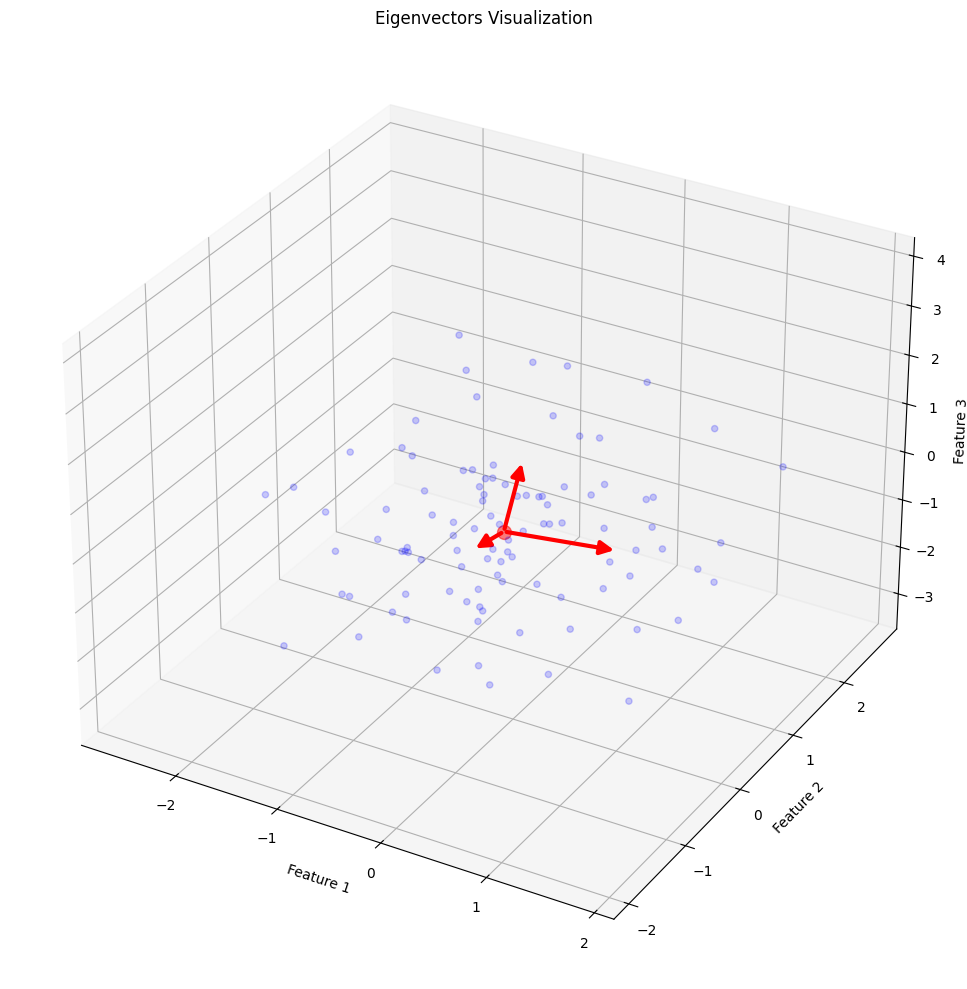

In [146]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        # Use the transformation matrix from the current axes
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)

    def do_3d_projection(self):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        return np.min(zs)

# Generate sample data
np.random.seed(42)
n_samples = 100
df1 = pd.DataFrame({
    'feature1': np.random.normal(0, 1, n_samples),
    'feature2': np.random.normal(0, 1, n_samples),
    'feature3': np.random.normal(0, 1, n_samples)
})

# Compute covariance matrix and its eigenvectors
cov_matrix = df1.cov()
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Create 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(df1['feature1'], df1['feature2'], df1['feature3'], c='blue', alpha=0.2)

# Plot mean point
mean_point = [df1['feature1'].mean(), df1['feature2'].mean(), df1['feature3'].mean()]
ax.scatter([mean_point[0]], [mean_point[1]], [mean_point[2]], c='red', s=100, alpha=0.5)

# Plot eigenvectors
for v in eigen_vectors.T:
    a = Arrow3D(
        [mean_point[0], mean_point[0] + v[0]],
        [mean_point[1], mean_point[1] + v[1]],
        [mean_point[2], mean_point[2] + v[2]],
        mutation_scale=20,
        lw=3,
        arrowstyle="-|>",
        color="r"
    )
    ax.add_artist(a)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.title('Eigenvectors Visualization')
plt.tight_layout()
plt.show()

In [147]:
pc=eigen_vectors[0:2]
pc

array([[-0.42417207,  0.8531223 , -0.30374397],
       [ 0.22708789,  0.42490168,  0.87629314]])

In [148]:
df.head()

,feature1,feature2,feature3,target
36,0.054043,-1.199389,0.374025,0
6,-2.759979,0.796719,-0.802450,1
32,-1.426127,1.577669,1.183919,0
35,0.679085,0.274406,1.102538,0
24,1.889712,0.566648,0.095524,0


In [149]:
transform_df=np.dot(df.iloc[:,0:3],pc.T)
df_new=pd.DataFrame(transform_df,columns=['pc1','pc1'])
df_new['target']=df['target'].values
df_new.head()

,pc1,pc1,target
0,-1.159757,-0.169594,0
1,2.094144,-0.991412,1
2,1.591259,1.383958,0
3,-0.388836,1.236954,0
4,-0.347158,0.753608,0


In [150]:
df1.shape

(100, 3)

In [151]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(df_new.iloc[:,:-1],df_new.iloc[:,-1],test_size=0.2,random_state=2)

In [152]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=8,shuffle=True)
cv_scores_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.65625
1.0


#`pca in mnist dataset`

In [157]:
# !pip install idx2numpy

In [209]:
import idx2numpy
# Load the IDX file
X_train = idx2numpy.convert_from_file('/content/train-images.idx3-ubyte')
print(X_train.shape)  # Check the shape of the loaded data

(60000, 28, 28)


In [210]:
# Load the IDX file
X_test = idx2numpy.convert_from_file('/content/t10k-images.idx3-ubyte')
print(X_test.shape)  # Check the shape of the loaded data

(10000, 28, 28)


In [211]:
# Load the IDX file
y_train = idx2numpy.convert_from_file('/content/train-labels.idx1-ubyte')
print(y_train.shape)  # Check the shape of the loaded data

(60000,)


In [212]:
# Load the IDX file
y_test = idx2numpy.convert_from_file('/content/t10k-labels.idx1-ubyte')
print(y_test.shape)  # Check the shape of the loaded data

(10000,)


In [213]:
import matplotlib.pyplot as plt

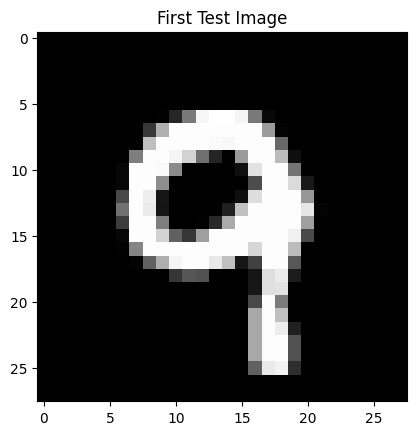

In [214]:
plt.imshow(X_test[99], cmap='gray')  # Display the first image
plt.title("First Test Image")
plt.show()


In [215]:
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten each sample to a 1D vector
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)  # Should print (n_samples, n_features)
print(X_test.shape)   # Should print (n_samples, n_features)

(60000, 784)
(10000, 784)


In [216]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
model=KNN.fit(X_train,y_train)

In [217]:
y_pred=model.predict(X_test)

In [218]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9688


In [219]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True)
cv_scores_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.9718166666666667
0.9502


In [220]:
## Ist step of pca
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [221]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [222]:
X_train.shape

(60000, 784)

In [223]:
KNN=KNeighborsClassifier()
model=KNN.fit(X_train_trf,y_train)

In [224]:
y_pred=model.predict(X_test_trf)

In [225]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9575


In [227]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True)
cv_scores_train = cross_val_score(model, X_train_trf, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test_trf, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.9598833333333333
0.9375


In [1]:
# for i in range(1,785):
#   pca=PCA(n_components=i)
#   X_train_trf=pca.fit_transform(X_train)
#   X_test_trf=pca.transform(X_test)
#   KNN=KNeighborsClassifier()
#   model=KNN.fit(X_train_trf,y_train)
#   y_pred=model.predict(X_test_trf)
#   print(accuracy_score(y_test,y_pred))

##`kernel pca step by step`

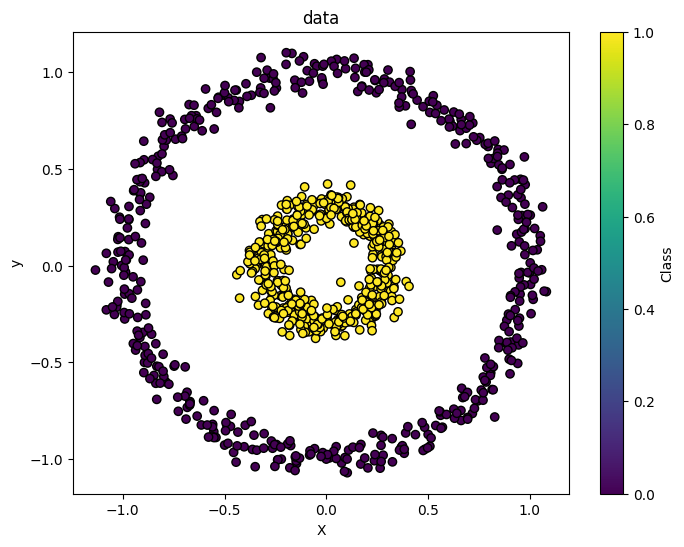

In [200]:
# Generate the dataset
X, y = make_circles(n_samples=1000, factor=.3, noise=.05)
# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("data")
plt.xlabel("X")
plt.ylabel("y")
plt.colorbar(label="Class")
plt.show()

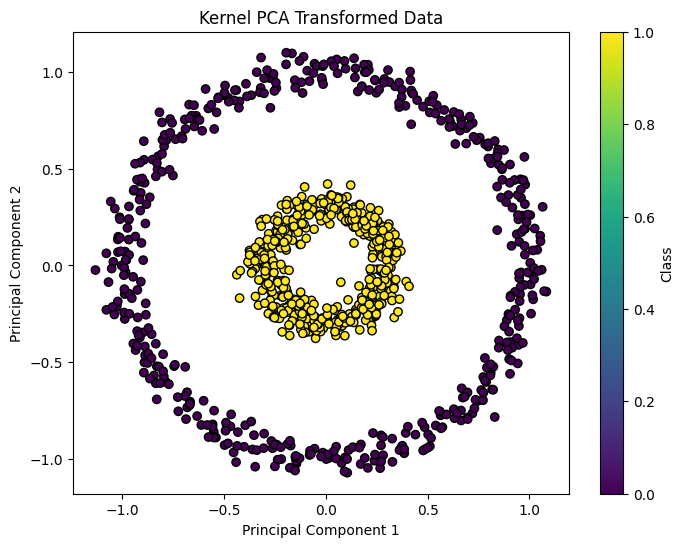

In [201]:
## mean center your dataset
X_centered=X-np.mean(X,axis=0)
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0],X_centered[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Kernel PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class")
plt.show()

In [202]:
def rbf_kernel(x,y, gamma=0.1):
    distance = np.linalg.norm(x - y) ** 2
    return np.exp(-gamma * distance)

# Create the kernel matrix
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf_kernel(X_centered[i], X_centered[j])

In [203]:
K.shape

(1000, 1000)

In [204]:
from scipy.linalg import eigh
eigenvalues, eigenvectors = eigh(K)

In [205]:
eigen_values=eigen_values[::-1]
eigen_vector=eigen_vectors[:,::-1]

In [206]:
eigen_values.shape

(400,)

In [207]:
eigen_vector.shape

(400, 400)

In [208]:
k = 2
X_trans= eigenvectors[:, :k]

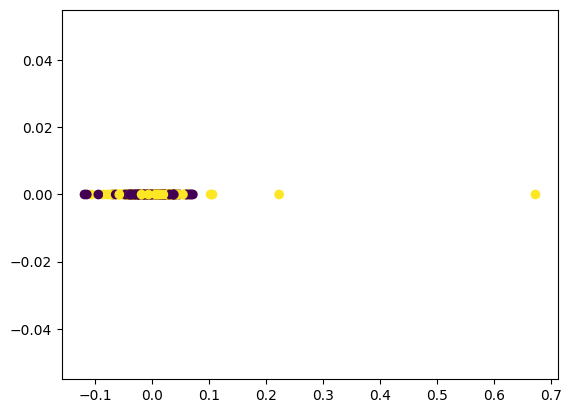

In [210]:
plt.scatter(X_trans[:,0],np.zeros((1000,)),c=y)

In [211]:
from sklearn.decomposition import KernelPCA
# Kernel PCA with eigen decomposition
kpca = KernelPCA(kernel='rbf', eigen_solver='arpack', n_components=2)
kpca = kpca.fit_transform(X_centered)
kpca.shape

(1000, 2)

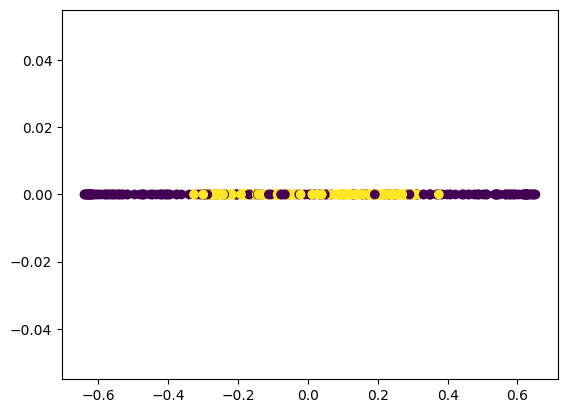

In [199]:
plt.scatter(kpca[:,1],np.zeros((400,1)),c=y)

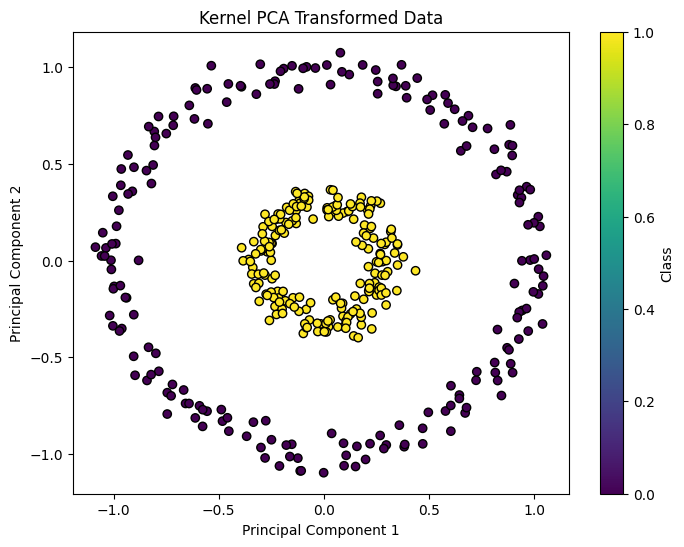

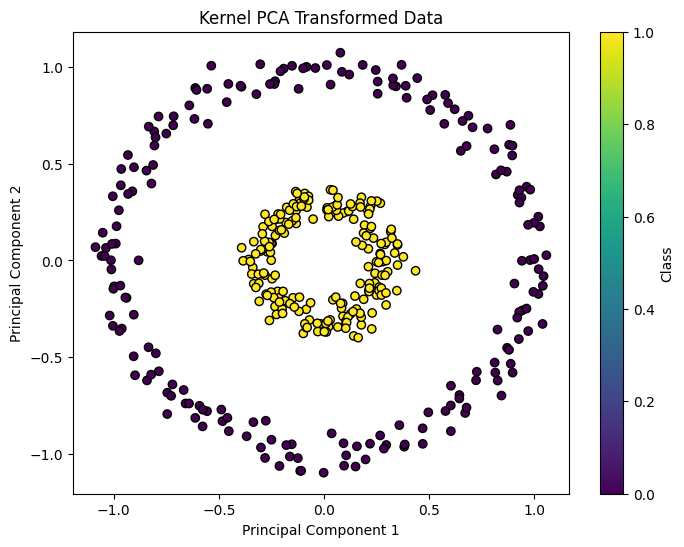

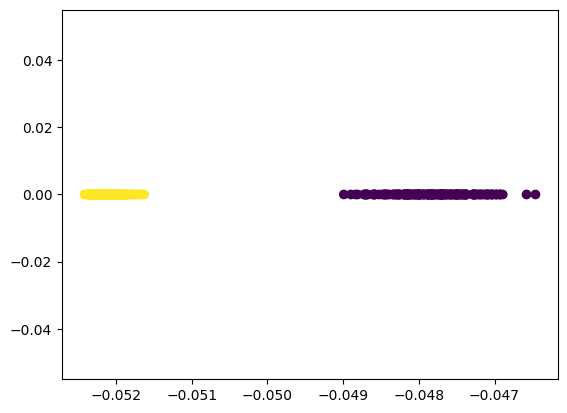

In [216]:
## define dataset
X,y=make_circles(n_samples=400,factor=0.3,noise=0.05)
# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Kernel PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class")
plt.show()

## mean center your dataset
X_centered=X-np.mean(X,axis=0)
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0],X_centered[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Kernel PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class")
plt.show()

## apply transformation
def rbf(x1,x2,gamma=0.1):
  distance=np.linalg.norm(x1-x2)**2
  return np.exp((-gamma) * distance)
n_samples=X.shape[0]
k=np.zeros((n_samples,n_samples))
for i in range(n_samples):
  for j in range(n_samples):
    k[i,j]=rbf(X_centered[i],X_centered[j])

k.shape

from scipy.linalg import eigh
eigen_values,eigen_vectors=eigh(k)

eigen_values=eigen_values[::-1]
eigen_vectors=eigen_vectors[:,::-1]

eigen_values.shape

eigen_vectors.shape

eigen_vectors=eigen_vectors[:,:2]
eigen_vectors.shape

plt.scatter(eigen_vectors[:,0],np.zeros((400,)),c=y)

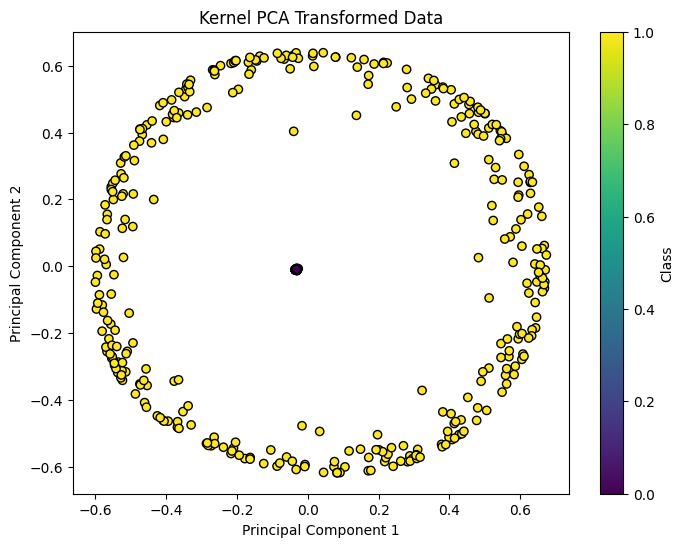

Classification Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       144

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate concentric circle data
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# Plot transformed data (optional visualization)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title("Kernel PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class")
plt.show()

# Train an SVM classifier on the transformed data
clf = SVC(kernel='rbf', C=1, gamma=0.5, random_state=42)
clf.fit(X_train_kpca, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_kpca)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

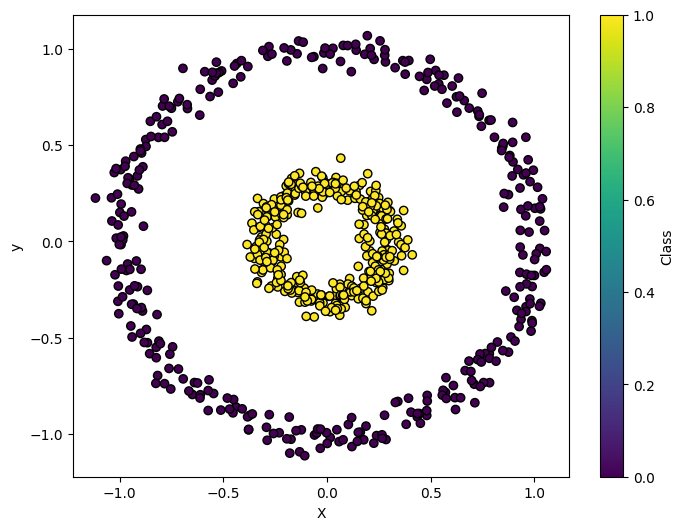

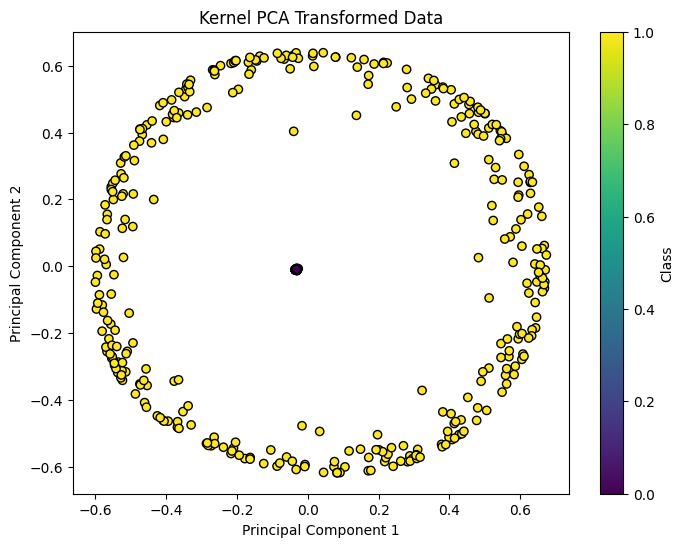

Classification Accuracy: 0.26

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       156
           1       0.33      0.54      0.41       144

    accuracy                           0.26       300
   macro avg       0.17      0.27      0.21       300
weighted avg       0.16      0.26      0.20       300



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate concentric circle data
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# Plot  data (optional visualization)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title("")
plt.xlabel("X")
plt.ylabel("y")
plt.colorbar(label="Class")
plt.show()

# Plot transformed data (optional visualization)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title("Kernel PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class")
plt.show()

# Train logistic regression on the transformed data
log_reg = LogisticRegression()
log_reg.fit(X_train_kpca, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_kpca)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))